# Example 1:
The following is an example of a grid search object with different scoring functions. Note that changing the scoring function may result in a different best score and/or best parameters. You can replace the default scoring function with any metrics we studied in class. The following example is a multinomial classification, so we also need to specify the "average" method as well. 

In [1]:
#First let's create a multinomial dataset. This dataset has four labels 0, 1, 2, and 3

from sklearn.datasets import make_multilabel_classification
X, t = make_multilabel_classification(n_samples=200, n_features=10, n_classes = 2, n_labels = 3,
                                     random_state = 0)
y = t[:,1]*2 + t[:, 0]

print('label 0:', len(y[y == 0]))
print('label 1:', len(y[y == 1]))
print('label 2:', len(y[y == 2]))
print('label 3:', len(y[y == 3]))
print('all lables:', len(y))      

label 0: 30
label 1: 24
label 2: 41
label 3: 105
all lables: 200


In [2]:
#preprocessing steps: spliting the dataset
#scaling train and test datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [3]:
#instantiate a GridSearcCV object with default scoring function (accuracy)

from sklearn.linear_model import LogisticRegression
param_grid = {'C':[1, 10, 25, 50, 75, 100]}

grid1 = GridSearchCV(LogisticRegression(multi_class = 'auto', solver = 'lbfgs', max_iter = 5000), 
                     param_grid, cv =7 , return_train_score= True, iid = False)
grid1.fit(X_train, y_train)
print(grid1.best_params_)
print(grid1.best_score_)
print(grid1.scorer_)

{'C': 25}
0.8529623748813026
<function _passthrough_scorer at 0x000001D46C991DC8>


In [4]:
import pandas as pd
result = pd.DataFrame(grid1.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.007694,0.001021,0.000000,0.000000,1,{'C': 1},0.739130,0.695652,0.782609,0.761905,...,6,0.779528,0.771654,0.755906,0.767442,0.775194,0.784615,0.770992,0.772190,0.008508
1,0.011681,0.001270,0.000143,0.000350,10,{'C': 10},0.826087,0.826087,0.826087,0.904762,...,5,0.913386,0.889764,0.921260,0.875969,0.914729,0.892308,0.893130,0.900078,0.015291
2,0.013688,0.001262,0.000281,0.000444,25,{'C': 25},0.826087,0.869565,0.826087,0.952381,...,1,0.929134,0.905512,0.913386,0.899225,0.906977,0.907692,0.893130,0.907865,0.010563
3,0.014818,0.001123,0.000143,0.000350,50,{'C': 50},0.826087,0.869565,0.869565,0.904762,...,2,0.929134,0.897638,0.913386,0.899225,0.930233,0.923077,0.900763,0.913351,0.013275
4,0.017381,0.001175,0.000000,0.000000,75,{'C': 75},0.826087,0.826087,0.869565,0.904762,...,3,0.944882,0.897638,0.921260,0.899225,0.930233,0.930769,0.900763,0.917824,0.017362


In [5]:
import matplotlib.pyplot as plt
import numpy as np

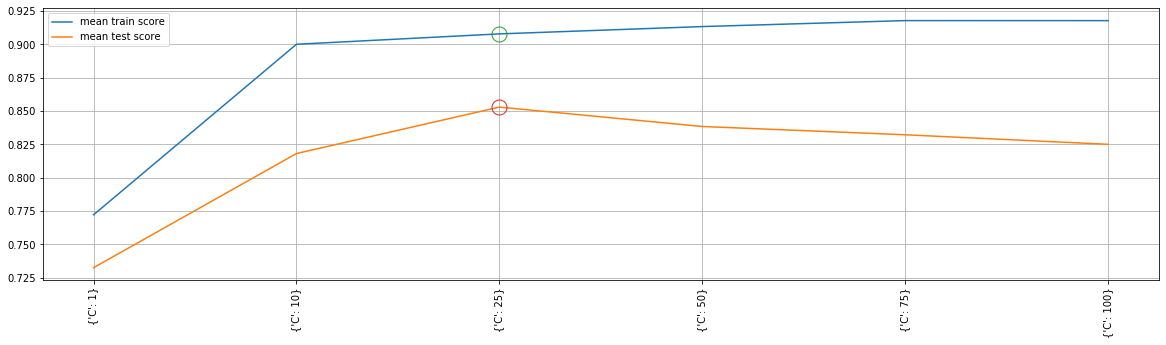

In [6]:
#Plot the average train and test score for this grid search model.
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid1.best_index_], result['mean_train_score'][grid1.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid1.best_index_], result['mean_test_score'][grid1.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

Now let's try a GridSearchCV with a user-defined scoring function like 'recall_macro.' You will see that the value of the best_score is different. This best_score is the average recall_macro score. 

In [7]:
from sklearn.svm import SVC
param_grid = {'C':[1, 10, 25, 50, 75, 100]}

grid2 = GridSearchCV(LogisticRegression(multi_class = 'auto', solver = 'lbfgs', max_iter = 5000), 
                     param_grid, cv =7 , return_train_score= True, scoring = 'recall_macro',
                     iid = False)
grid2.fit(X_train, y_train)
print(grid2.best_params_)
print(grid2.best_score_)
print(grid2.scorer_)

{'C': 25}
0.8057359307359307
make_scorer(recall_score, pos_label=None, average=macro)


In [ ]:
print


In [8]:
result = pd.DataFrame(grid2.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.006870,0.006224,0.002374,0.005419,1,{'C': 1},0.566667,0.516667,0.679167,0.566667,...,6,0.619223,0.596113,0.572479,0.607966,0.616895,0.623597,0.615438,0.607387,0.016493
1,0.010861,0.006535,0.000285,0.000450,10,{'C': 10},0.762500,0.762500,0.762500,0.852273,...,5,0.874475,0.858193,0.889181,0.823286,0.870361,0.837993,0.854073,0.858223,0.020760
2,0.011157,0.007056,0.000000,0.000000,25,{'C': 25},0.762500,0.845833,0.762500,0.977273,...,1,0.907038,0.881828,0.885504,0.884369,0.877821,0.874363,0.867116,0.882577,0.011587
3,0.015621,0.008349,0.000000,0.000000,50,{'C': 50},0.762500,0.845833,0.845833,0.927273,...,2,0.912290,0.892332,0.885504,0.884369,0.927821,0.899650,0.883783,0.897964,0.015457
4,0.014703,0.004187,0.000143,0.000349,75,{'C': 75},0.762500,0.825000,0.845833,0.927273,...,3,0.948004,0.892332,0.903361,0.884369,0.927821,0.916317,0.896827,0.909861,0.020662


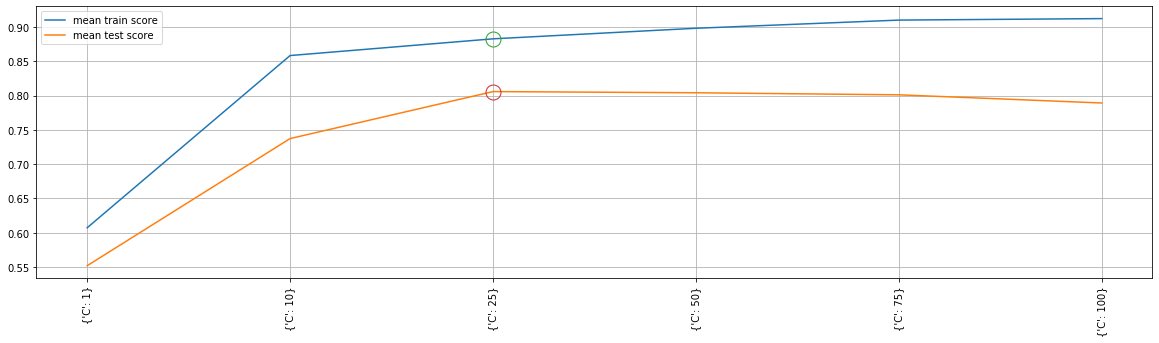

In [9]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid2.best_index_], result['mean_train_score'][grid2.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid2.best_index_], result['mean_test_score'][grid2.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

# Example 2

There are times that we need to have some post-processing on model values. In this example, we are generating another dataset with only two labels. As you can see, this dataset is imbalanced, so obviously, we need to have another evaluation metric to test our models. 

In [10]:
from sklearn.datasets import make_multilabel_classification
X, y = make_multilabel_classification(n_samples=500, n_features=10, n_classes = 1, n_labels = 2,
                                     random_state = 0)
print('label 0:', len(y[y == 0])/len(y))
print('label 1:', len(y[y == 1])/len(y))
y = y.reshape(-1,)

label 0: 0.344
label 1: 0.656


In [11]:
#preprocessing steps: spliting the dataset
#scaling train and test datasets
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [12]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth':[1, 2, 3, 5, 7, 10]}

grid3 = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv = 5, 
                    return_train_score= True, iid = False)
grid3.fit(X_train, y_train)
print(grid3.best_params_)
print(grid3.best_score_)
print(grid3.scorer_)

{'max_depth': 5}
0.7813333333333332
<function _passthrough_scorer at 0x000001D46C991DC8>


In [13]:
result = pd.DataFrame(grid3.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000000,0.000000,0.0,0.0,1,{'max_depth': 1},0.773333,0.706667,0.680000,0.720000,...,0.730667,0.037142,6,0.746667,0.763333,0.706667,0.760000,0.746667,0.744667,0.020177
1,0.000000,0.000000,0.0,0.0,2,{'max_depth': 2},0.773333,0.706667,0.746667,0.706667,...,0.744000,0.033092,5,0.800000,0.780000,0.793333,0.840000,0.796667,0.802000,0.020177
2,0.000000,0.000000,0.0,0.0,3,{'max_depth': 3},0.786667,0.760000,0.733333,0.720000,...,0.773333,0.051983,3,0.850000,0.846667,0.830000,0.850000,0.830000,0.841333,0.009333
3,0.000000,0.000000,0.0,0.0,5,{'max_depth': 5},0.786667,0.786667,0.720000,0.746667,...,0.781333,0.049603,1,0.930000,0.923333,0.930000,0.936667,0.916667,0.927333,0.006799
4,0.003396,0.006792,0.0,0.0,7,{'max_depth': 7},0.760000,0.773333,0.746667,0.773333,...,0.776000,0.027195,2,0.976667,0.993333,0.983333,0.980000,0.960000,0.978667,0.010873


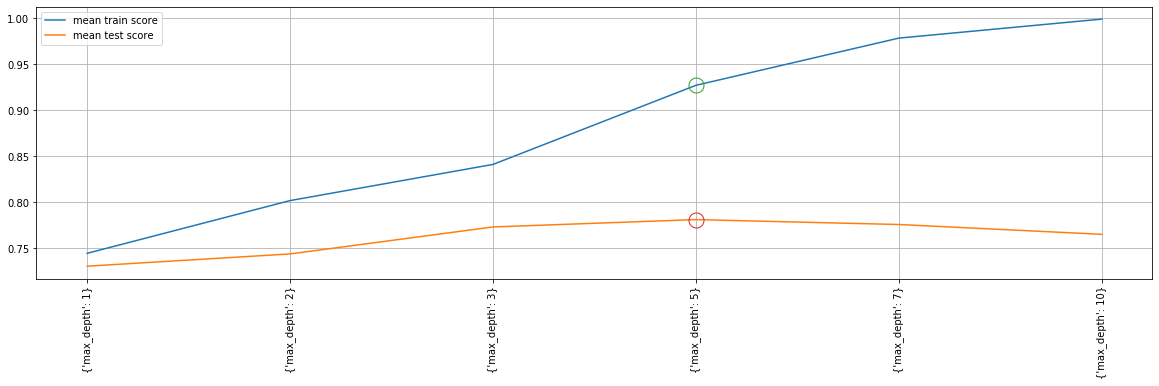

In [14]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid3.best_index_], result['mean_train_score'][grid3.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid3.best_index_], result['mean_test_score'][grid3.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [15]:
#Now we are creating a model with user-defined scoring function
param_grid = {'max_depth':[1, 2, 3, 5, 7, 10]}

grid4 = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv = 5, return_train_score= True,
                    scoring = 'roc_auc', iid = False)
grid4.fit(X_train, y_train)
print(grid4.best_params_)
print(grid4.best_score_)
print(grid4.scorer_)

{'max_depth': 3}
0.8266875981161697
make_scorer(roc_auc_score, needs_threshold=True)


In [16]:
result = pd.DataFrame(grid4.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0,0.0,0.000000,0.000000,1,{'max_depth': 1},0.754317,0.694270,0.691915,0.704474,...,0.716248,0.024753,6,0.724882,0.739894,0.734890,0.737343,0.729396,0.733281,0.005449
1,0.0,0.0,0.003131,0.006262,2,{'max_depth': 2},0.781005,0.766876,0.734694,0.740581,...,0.772370,0.037240,3,0.853414,0.839359,0.817013,0.831927,0.837863,0.835915,0.011790
2,0.0,0.0,0.000000,0.000000,3,{'max_depth': 3},0.792386,0.803768,0.810440,0.826531,...,0.826688,0.038436,1,0.902718,0.895187,0.886014,0.904116,0.892514,0.896110,0.006686
3,0.0,0.0,0.003129,0.006258,5,{'max_depth': 5},0.765306,0.837127,0.700549,0.760989,...,0.791523,0.066939,2,0.969780,0.980377,0.974514,0.970320,0.977826,0.974563,0.004131
4,0.0,0.0,0.003122,0.006244,7,{'max_depth': 7},0.720958,0.767661,0.714286,0.735086,...,0.756672,0.048012,4,0.995634,0.999657,0.999166,0.997768,0.994751,0.997395,0.001923


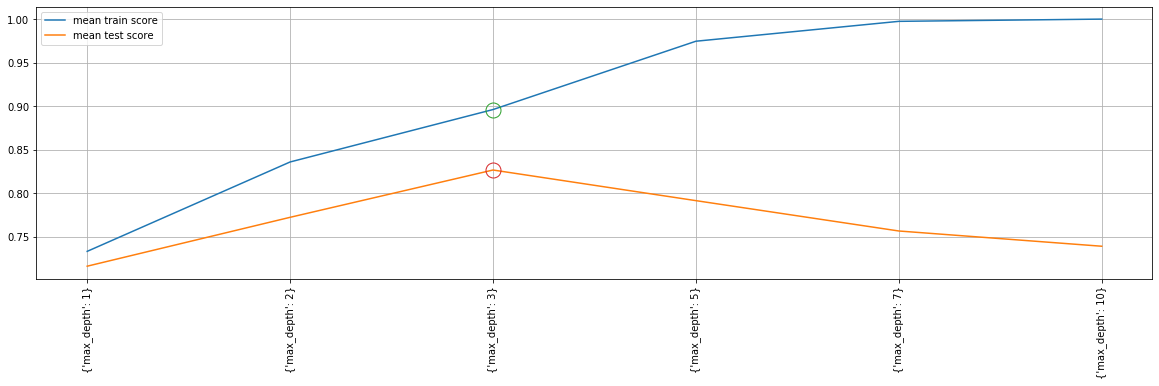

In [17]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid4.best_index_], result['mean_train_score'][grid4.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid4.best_index_], result['mean_test_score'][grid4.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

Now let's take a look at the decision function and see if we can improve the recall score. 

In [18]:
y_train_pred = grid4.predict_proba(X_train)[:,0]

In [19]:
from sklearn.metrics import roc_curve

tpr, fpr, threshold = roc_curve(y_train, y_train_pred)
print(threshold)
print(tpr)
print(fpr)

[1.95238095 0.95238095 0.92307692 0.85714286 0.63157895 0.35714286
 0.30136986 0.13793103 0.03571429]
[0.         0.30769231 0.4        0.44615385 0.72307692 0.76153846
 0.93076923 0.96153846 1.        ]
[0.         0.00816327 0.0122449  0.01632653 0.10204082 0.13877551
 0.34693878 0.44897959 1.        ]


Text(0, 0.5, 'TPR (Recall)')

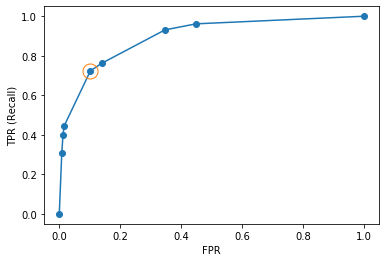

In [22]:
%matplotlib inline

plt.plot( fpr, tpr, 'o-')
#default thrshold for predict_proba is 0.5
default_index = np.argmin(np.abs(threshold - 0.5))
plt.plot(fpr[default_index], tpr[default_index], 'o', markersize = 15, fillstyle = 'none')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

The following is the confusion matrix for ``grid4`` model. 

In [57]:
from sklearn.metrics import confusion_matrix, roc_auc_score

confusion_matrix(y_train, grid4.predict(X_train))

array([[ 94,  36],
       [ 25, 220]], dtype=int64)

In [58]:
roc_auc_score(y_train, grid4.predict(X_train))

0.8105180533751962

Now, we are going to post-process the prdiction of ``grid4`` model to have a higher recall value. Lets say we would like to keep the ``FPR`` around 0.2. We need to find the threshold for this FPR range. 

In [92]:
#np.argmin(np.abs(fpr - 0.20)): find the index of the closest value in fpr array
y_train_post_pred = np.where(y_train_pred < threshold[np.argmin(np.abs(fpr - 0.20))], 1, 0)

In [93]:
confusion_matrix(y_train, y_train_post_pred)

array([[ 99,  31],
       [ 34, 211]], dtype=int64)

In [94]:
roc_auc_score(y_train, y_train_post_pred)

0.8113814756671899

You can see with this simple post processing we could slightly make the ``roc_auc_score`` better. 